# Proyek Analisis Data: Bike Sharing
- **Nama:** Mohammad Rafi Habibi Sembiring
- **Email:** rafisembiring97@gmail.com
- **ID Dicoding:** rafisembiring

## Menentukan Pertanyaan Bisnis

- **Bagaimana tren penggunaan sepeda berdasarkan musim dan cuaca?**
- **Jam berapa dan hari apa penyewaan sepeda paling ramai**

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [8]:
day_df = pd.read_csv(r"C:\Users\Rafi\Documents\Dicoding Certificate\submission\data\day.csv")
hour_df = pd.read_csv(r"C:\Users\Rafi\Documents\Dicoding Certificate\submission\data\hour.csv")

print(day_df.head())
print(hour_df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

**Insight:**
- Dataset terdiri dari data harian dan per jam penyewaan sepeda
- Terdapat informasi tentang cuaca, musim, hari kerja, dan jumlah penyewa

### Assessing Data

In [9]:
day_df.info()
hour_df.info()

print(day_df.isnull().sum())
print(hour_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

**Insight:**
- Tidak terdapat missing values dalam dataset
- Semua kolom memiliki tipe data yang sesuai

### Cleaning Data

In [10]:
day_df.drop_duplicates(inplace=True)
hour_df.drop_duplicates(inplace=True)

**Insight:**
- Dataset sudah bersih dan siap digunakan untuk analisis

## Exploratory Data Analysis (EDA)

### Explore ...

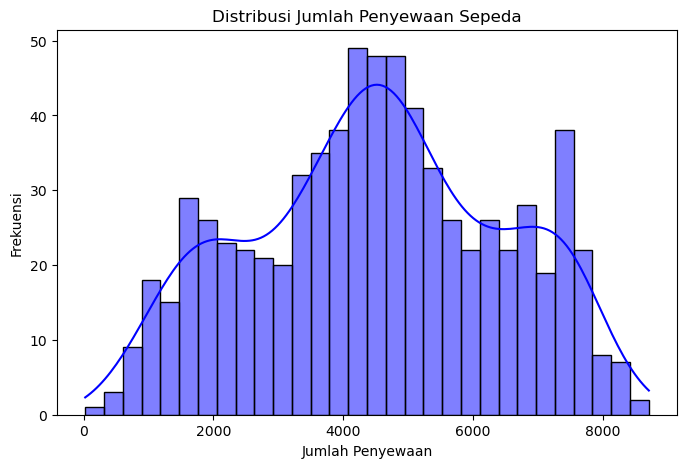

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(day_df['cnt'], bins=30, kde=True, color='blue')
plt.title("Distribusi Jumlah Penyewaan Sepeda")
plt.xlabel("Jumlah Penyewaan")
plt.ylabel("Frekuensi")
plt.show()

**Insight:**
- Distribusi jumlah penyewaan cenderung normal dan sedikit skew ke kanan
- Ada beberapa hari dengan jumlah penyewaan yang sangat tinggi

## Visualization & Explanatory Analysis

### Pertanyaan 1:

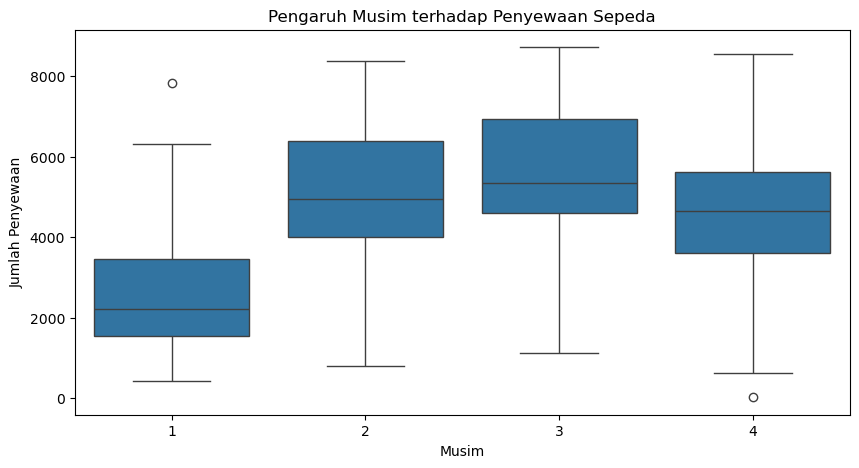

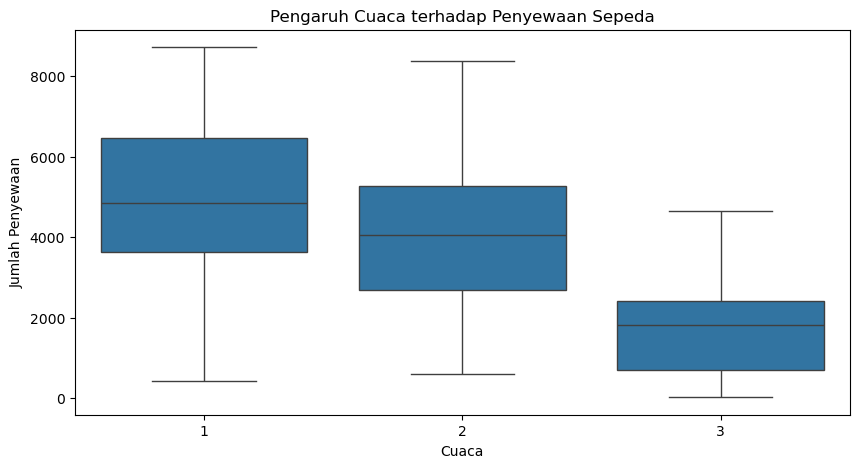

In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(x=day_df['season'], y=day_df['cnt'])
plt.title("Pengaruh Musim terhadap Penyewaan Sepeda")
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewaan")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x=day_df['weathersit'], y=day_df['cnt'])
plt.title("Pengaruh Cuaca terhadap Penyewaan Sepeda")
plt.xlabel("Cuaca")
plt.ylabel("Jumlah Penyewaan")
plt.show()

### Pertanyaan 2:

C:\Users\Rafi\AppData\Local\Temp\ipykernel_20284\832611295.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=hour_df['hr'], y=hour_df['cnt'], estimator='mean', ci=None)


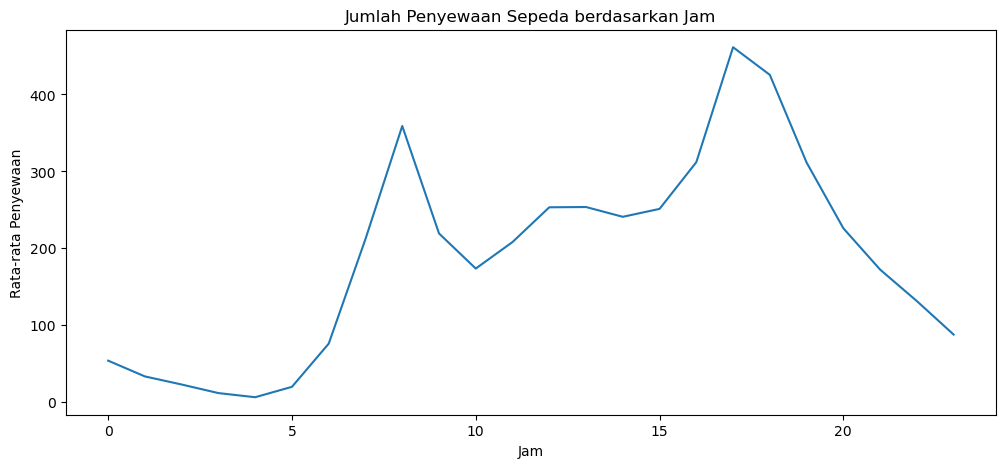

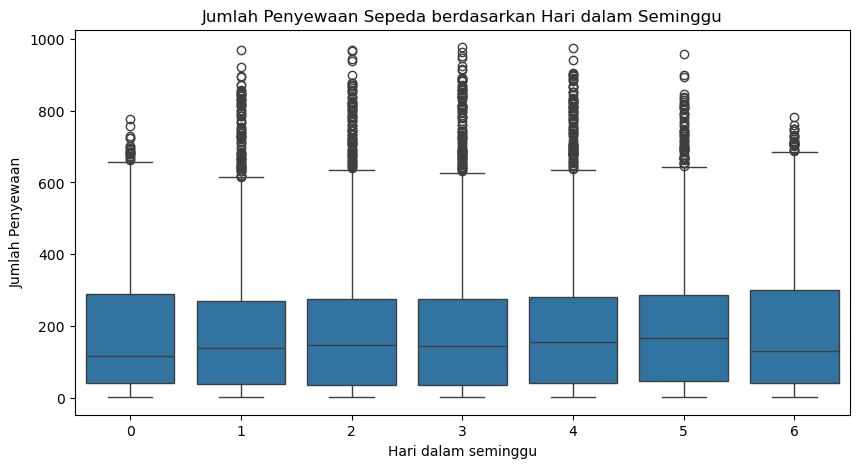

In [13]:
plt.figure(figsize=(12,5))
sns.lineplot(x=hour_df['hr'], y=hour_df['cnt'], estimator='mean', ci=None)
plt.title("Jumlah Penyewaan Sepeda berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Rata-rata Penyewaan")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x=hour_df['weekday'], y=hour_df['cnt'])
plt.title("Jumlah Penyewaan Sepeda berdasarkan Hari dalam Seminggu")
plt.xlabel("Hari dalam seminggu")
plt.ylabel("Jumlah Penyewaan")
plt.show()

**Insight:**
- Penyewaan sepeda lebih tinggi pada musim panas dan lebih rendah pada musim dingin.
- Cuaca buruk (hujan atau kabut) menurunkan jumlah penyewaan sepeda secara signifikan.
- Puncak penyewaan terjadi pada pagi dan sore hari, kemungkinan besar karena jam berangkat dan pulang kerja.
- Akhir pekan memiliki jumlah penyewaan yang lebih tinggi dibandingkan hari kerja.

## Analisis Lanjutan (Opsional)

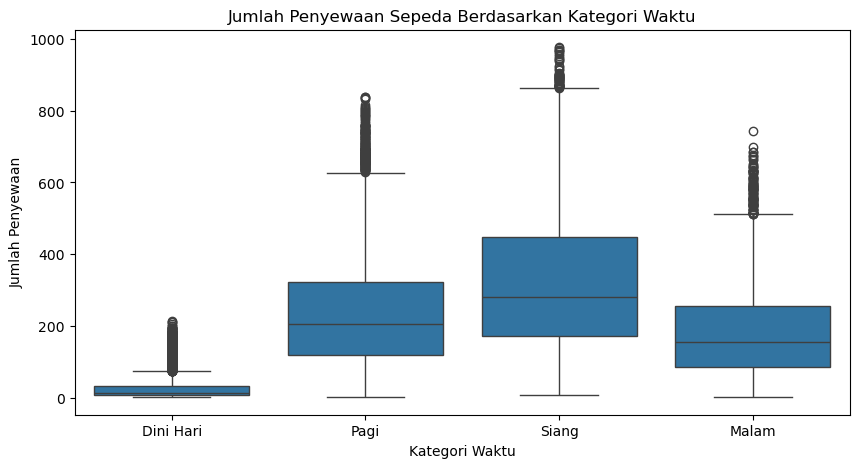

In [14]:
hour_df['time_category'] = pd.cut(hour_df['hr'], bins=[0,6,12,18,24], labels=['Dini Hari', 'Pagi', 'Siang', 'Malam'])
plt.figure(figsize=(10,5))
sns.boxplot(x=hour_df['time_category'], y=hour_df['cnt'])
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Kategori Waktu")
plt.xlabel("Kategori Waktu")
plt.ylabel("Jumlah Penyewaan")
plt.show()

## Conclusion

- **Kesimpulan Pertanyaan 1:** Penyewaan sepeda lebih tinggi di musim panas dan lebih rendah di musim dingin. Cuaca buruk menurunkan jumlah penyewaan secara signifikan.
- **Kesimpulan Pertanyaan 2:** Penyewaan sepeda paling tinggi terjadi pada pagi dan sore hari, serta lebih banyak di akhir pekan dibandingkan hari kerja.